# Лабораторна робота №3 з глибинного навчання студента групи Ім-17 Бєлінського Андрія

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def sign_theta(U_inp_A, theta):
    out = np.zeros((U_inp_A.shape[0], U_inp_A.shape[1]))
    out[U_inp_A >= theta] = 1 
    out[U_inp_A < theta] = 0
    
    return out

def out_S(inp_lett):
    out = np.zeros((inp_lett.shape[0], inp_lett.shape[1]))
    out[inp_lett == 1] = 1 
    out[inp_lett == -1] = 0
    
    return out

def out_R(U_inp_R, theta):
    if U_inp_R.shape == (1,):
        if U_inp_R >= theta:
            return 1
        else:
            return -1
    else:
        out = np.zeros((U_inp_R.shape[0], U_inp_R.shape[1]))
        out[U_inp_R >= theta] = 1 
        out[U_inp_R < theta] = -1
    
        return out

### Налаштуємо перцептрон на роспізнавання літер А та В

In [181]:
letters = np.array([
    [-1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1], 
    [1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1]
])

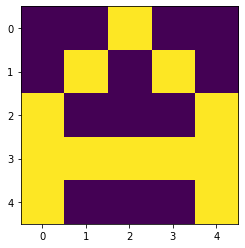

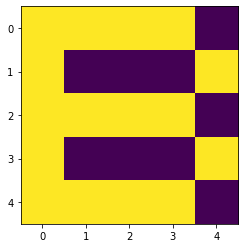

In [58]:
for i in range(letters.shape[0]):
    plt.imshow(letters[i].reshape((5, 5)), interpolation='nearest')
    plt.show()

### Вимагатимемо від мережі, щоб при представленні зображення букви А на виході R-елемента бува сигнал "1", при появі другого зображення - сигнал "-1".

In [208]:
labels = np.array([[1],
                  [-1]])

## Ваги $w^{1}_{ij}$ зв'язків перцептрона між S- та A елементами
## Для даної задачі використаємо 6 A-елементів

### Випадковим чином

In [159]:
w_1 = np.random.rand(6, letters.shape[1])
w_1

array([[0.02496499, 0.49812047, 0.51988947, 0.1753371 , 0.3137243 ,
        0.16669571, 0.16260644, 0.78877732, 0.47045048, 0.00185582,
        0.98010376, 0.08825511, 0.07699937, 0.60555824, 0.25482464,
        0.80655716, 0.69420391, 0.50590699, 0.04360393, 0.69837036,
        0.35835856, 0.07654744, 0.70417425, 0.89288361, 0.16929829],
       [0.72212883, 0.32586249, 0.42781445, 0.41262245, 0.37805521,
        0.15469888, 0.30604738, 0.47887528, 0.68590352, 0.97519903,
        0.17171021, 0.15293825, 0.86726846, 0.40944839, 0.56108351,
        0.37479801, 0.55738393, 0.05005078, 0.91676991, 0.96403375,
        0.97125412, 0.28926607, 0.8019715 , 0.02592639, 0.43599283],
       [0.89011509, 0.55815508, 0.91123787, 0.22130288, 0.69507015,
        0.52746873, 0.10706692, 0.88597515, 0.78021802, 0.0412088 ,
        0.19774185, 0.47683238, 0.48075275, 0.39329124, 0.60356517,
        0.65290537, 0.33969453, 0.23322257, 0.51399825, 0.04403014,
        0.56362384, 0.86579256, 0.74724533, 0.

### Власні значення

In [212]:
w_1 = np.array([[0.02496499, 0.49812047, 0.51988947, 0.1753371 , 0.3137243 ,
        0.16669571, 0.16260644, 0.78877732, 0.47045048, 0.00185582,
        0.98010376, 0.08825511, 0.07699937, 0.60555824, 0.25482464,
        0.80655716, 0.69420391, 0.50590699, 0.04360393, 0.69837036,
        0.35835856, 0.07654744, 0.70417425, 0.89288361, 0.16929829],
       [0.72212883, 0.32586249, 0.42781445, 0.41262245, 0.37805521,
        0.15469888, 0.30604738, 0.47887528, 0.68590352, 0.97519903,
        0.17171021, 0.15293825, 0.86726846, 0.40944839, 0.56108351,
        0.37479801, 0.55738393, 0.05005078, 0.91676991, 0.96403375,
        0.97125412, 0.28926607, 0.8019715 , 0.02592639, 0.43599283],
       [0.89011509, 0.55815508, 0.91123787, 0.22130288, 0.69507015,
        0.52746873, 0.10706692, 0.88597515, 0.78021802, 0.0412088 ,
        0.19774185, 0.47683238, 0.48075275, 0.39329124, 0.60356517,
        0.65290537, 0.33969453, 0.23322257, 0.51399825, 0.04403014,
        0.56362384, 0.86579256, 0.74724533, 0.908241  , 0.60485381],
       [0.40953696, 0.56530944, 0.92574359, 0.27086634, 0.96535353,
        0.71034058, 0.2407078 , 0.36253235, 0.24820772, 0.50687392,
        0.66023173, 0.71169075, 0.15955281, 0.18455441, 0.65727878,
        0.88987381, 0.53082947, 0.26159848, 0.34933457, 0.39798404,
        0.75550809, 0.84678972, 0.58777885, 0.84681002, 0.54447973],
       [0.93553612, 0.87219669, 0.47897123, 0.46523473, 0.30390029,
        0.71157442, 0.36893007, 0.58950712, 0.63771684, 0.56671791,
        0.80611723, 0.21266755, 0.77086007, 0.46661037, 0.17329066,
        0.75022107, 0.7647045 , 0.94395909, 0.79072314, 0.45394185,
        0.57615678, 0.26663879, 0.69732547, 0.88938354, 0.27476265],
       [0.37181657, 0.05172584, 0.04633333, 0.19798325, 0.83916398,
        0.34641901, 0.19742376, 0.96017506, 0.91755846, 0.76103775,
        0.14046631, 0.51849763, 0.45310174, 0.64565231, 0.4441309 ,
        0.98490652, 0.39011258, 0.04636631, 0.20498265, 0.87724332,
        0.83549412, 0.60602203, 0.9272641 , 0.86771618, 0.00562046]])

w_1

array([[0.02496499, 0.49812047, 0.51988947, 0.1753371 , 0.3137243 ,
        0.16669571, 0.16260644, 0.78877732, 0.47045048, 0.00185582,
        0.98010376, 0.08825511, 0.07699937, 0.60555824, 0.25482464,
        0.80655716, 0.69420391, 0.50590699, 0.04360393, 0.69837036,
        0.35835856, 0.07654744, 0.70417425, 0.89288361, 0.16929829],
       [0.72212883, 0.32586249, 0.42781445, 0.41262245, 0.37805521,
        0.15469888, 0.30604738, 0.47887528, 0.68590352, 0.97519903,
        0.17171021, 0.15293825, 0.86726846, 0.40944839, 0.56108351,
        0.37479801, 0.55738393, 0.05005078, 0.91676991, 0.96403375,
        0.97125412, 0.28926607, 0.8019715 , 0.02592639, 0.43599283],
       [0.89011509, 0.55815508, 0.91123787, 0.22130288, 0.69507015,
        0.52746873, 0.10706692, 0.88597515, 0.78021802, 0.0412088 ,
        0.19774185, 0.47683238, 0.48075275, 0.39329124, 0.60356517,
        0.65290537, 0.33969453, 0.23322257, 0.51399825, 0.04403014,
        0.56362384, 0.86579256, 0.74724533, 0.

## Ваги $w^{2}_{k}$ зв'язків перцептрона між R- та A елементами

### Випадковим чином

In [160]:
w_2 = np.random.rand(1, 6)
w_2

array([[0.68161656, 0.076982  , 0.36931696, 0.7775845 , 0.73257279,
        0.3194842 ]])

### Власні значення

In [213]:
w_2 = np.array([[0.68161656, 0.076982  , 0.36931696, 0.7775845 , 0.73257279,
        0.3194842 ]])

w_2

array([[0.68161656, 0.076982  , 0.36931696, 0.7775845 , 0.73257279,
        0.3194842 ]])

## Величини сигналів на входах А-елементів

In [214]:
U_inp_A = out_S(letters) @ w_1.T
U_inp_A

array([[5.66417399, 6.4228424 , 5.55215834, 6.46177781, 7.01949511,
        5.09063872],
       [6.67467142, 8.04694128, 8.47994491, 9.42944506, 9.92015382,
        8.63168001]])

## Для кращого розмежування 2-ох образів найбільш підходящим виявиться $\theta = 6.5$. Крок навчання $\eta$ прирівняємо до 0.1, як у методичці. Нехай $\theta_{R} = 1.5$.  

In [215]:
theta = 6.5
theta_R = 1.5
eta = 0.1

In [216]:
U_out_A = sign_theta(U_inp_A, theta)

In [217]:
U_out_A

array([[0., 0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 1., 1.]])

In [218]:
U_inp_R = U_out_A @ w_2.T
U_inp_R

array([[0.73257279],
       [2.95755701]])

## $\alpha$-навчання 

In [219]:
w_2_alpha = w_2.copy()

In [220]:
w_2_alpha

array([[0.68161656, 0.076982  , 0.36931696, 0.7775845 , 0.73257279,
        0.3194842 ]])

In [221]:
num_of_it = 1
while np.any(out_R(U_inp_R, theta_R) != labels):
    print(f"Навчання під номером {num_of_it}", end="\n\n")
    
    if out_R(U_out_A[0] @ w_2_alpha.T, theta_R) != labels[0]: 
        w_2_alpha[np.where(U_out_A[0].reshape(1, -1) == 1)] += eta
        
    if out_R(U_out_A[1] @ w_2_alpha.T, theta_R) != labels[1]:
        w_2_alpha[np.where(U_out_A[1].reshape(1, -1) == 1)] -= eta
        
    U_inp_R = U_out_A @ w_2_alpha.T
    
    print("Вагові коефіцієнти дорівнюють: ", end="\n\n")
    print(w_2_alpha, end="\n\n")
    print("На вхід R значення дорівнюють: ", end="\n\n")
    print(U_inp_R, end="\n\n")
    
    num_of_it += 1

Навчання під номером 1

Вагові коефіцієнти дорівнюють: 

[[ 0.58161656 -0.023018    0.26931696  0.6775845   0.73257279  0.2194842 ]]

На вхід R значення дорівнюють: 

[[0.73257279]
 [2.45755701]]

Навчання під номером 2

Вагові коефіцієнти дорівнюють: 

[[ 0.48161656 -0.123018    0.16931696  0.5775845   0.73257279  0.1194842 ]]

На вхід R значення дорівнюють: 

[[0.73257279]
 [1.95755701]]

Навчання під номером 3

Вагові коефіцієнти дорівнюють: 

[[ 0.38161656 -0.223018    0.06931696  0.4775845   0.73257279  0.0194842 ]]

На вхід R значення дорівнюють: 

[[0.73257279]
 [1.45755701]]

Навчання під номером 4

Вагові коефіцієнти дорівнюють: 

[[ 0.28161656 -0.323018   -0.03068304  0.3775845   0.73257279 -0.0805158 ]]

На вхід R значення дорівнюють: 

[[0.73257279]
 [0.95755701]]

Навчання під номером 5

Вагові коефіцієнти дорівнюють: 

[[ 0.28161656 -0.323018   -0.03068304  0.3775845   0.83257279 -0.0805158 ]]

На вхід R значення дорівнюють: 

[[0.83257279]
 [1.05755701]]

Навчання під но

## $\gamma$-навчання

In [224]:
U_inp_R = U_out_A @ w_2.T
U_inp_R

array([[0.73257279],
       [2.95755701]])

In [225]:
w_2_gamma = w_2.copy()

In [226]:
num_of_it = 1
N = len(U_out_A)
N_active = np.count_nonzero(U_out_A)

while np.any(out_R(U_inp_R, theta_R) != labels):
    print(f"Навчання під номером {num_of_it}", end="\n\n")
    
    delta_w = np.zeros((w_2_gamma.shape[0], w_2_gamma.shape[1]))
    delta_w[np.where(U_out_A[0].reshape(1, -1) == 1)] = eta - (N_active * eta / N)
    delta_w[np.where(U_out_A[0].reshape(1, -1) == 0)] = -N_active * eta / N
    
    if out_R(U_out_A[0] @ w_2_gamma.T, theta_R) != labels[0]: 
        w_2_gamma[np.where(U_out_A[0].reshape(1, -1) == 1)] -= delta_w[np.where(U_out_A[0].reshape(1, -1) == 1)]
        
    if out_R(U_out_A[1] @ w_2_gamma.T, theta_R) != labels[1]:
        w_2_gamma[np.where(U_out_A[1].reshape(1, -1) == 1)] += delta_w[np.where(U_out_A[1].reshape(1, -1) == 1)]
        
    U_inp_R = U_out_A @ w_2_gamma.T
    
    print("Вагові коефіцієнти дорівнюють: ", end="\n\n")
    print(w_2_gamma, end="\n\n")
    print("На вхід R значення дорівнюють: ", end="\n\n")
    print(U_inp_R, end="\n\n")
    
    num_of_it += 1

Навчання під номером 1

Вагові коефіцієнти дорівнюють: 

[[ 0.33161656 -0.273018    0.01931696  0.4275845   0.73257279 -0.0305158 ]]

На вхід R значення дорівнюють: 

[[0.73257279]
 [1.20755701]]

Навчання під номером 2

Вагові коефіцієнти дорівнюють: 

[[ 0.33161656 -0.273018    0.01931696  0.4275845   0.98257279 -0.0305158 ]]

На вхід R значення дорівнюють: 

[[0.98257279]
 [1.45755701]]

Навчання під номером 3

Вагові коефіцієнти дорівнюють: 

[[-0.01838344 -0.623018   -0.33068304  0.0775845   0.98257279 -0.3805158 ]]

На вхід R значення дорівнюють: 

[[ 0.98257279]
 [-0.29244299]]

Навчання під номером 4

Вагові коефіцієнти дорівнюють: 

[[-0.01838344 -0.623018   -0.33068304  0.0775845   1.23257279 -0.3805158 ]]

На вхід R значення дорівнюють: 

[[ 1.23257279]
 [-0.04244299]]

Навчання під номером 5

Вагові коефіцієнти дорівнюють: 

[[-0.01838344 -0.623018   -0.33068304  0.0775845   1.48257279 -0.3805158 ]]

На вхід R значення дорівнюють: 

[[1.48257279]
 [0.20755701]]

Навчання пі

## Можна бачити, що обидва підходи дозволяють вдало навчитися на представленному прикладі, хоча $\gamma$-навчання у нашому випадку збігається швидше до потрібних для нас міток. 